In [2]:
import igraph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
from numpy import linalg as LA
from collections import OrderedDict
from operator import itemgetter

In [3]:
graph_data = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ";")

In [241]:
df = graph_data[graph_data["node2"] == 167]
df

node1  node2  timestamp
80046     47    167      55944

In [4]:
graph_data[graph_data["node1"] == 2 ].head()

node1  node2  timestamp
96        2     59         63
104       2     59         71
791       2     59        552
862       2     59        598
1068      2     94        737

In [5]:
graph_data_nodes = graph_data.drop(["timestamp"], axis=1)

In [6]:
graph_data_nodes.head()

node1  node2
0      1      2
1      1      3
2      1      4
3      1      5
4      1      6

In [7]:
G_predata = [tuple(x) for x in graph_data_nodes.values]

In [8]:
tuples = [tuple(x) for x in graph_data_nodes.values]

In [9]:
uniqueTup = list(set(tuples))

In [10]:
Gm = igraph.Graph.TupleList(uniqueTup, directed = False)

NameError: name 'igraph' is not defined

In [11]:
uniqueTup[:10]

[(50, 96),
 (32, 54),
 (14, 74),
 (74, 106),
 (38, 124),
 (48, 86),
 (104, 115),
 (16, 47),
 (72, 92),
 (1, 64)]

In [12]:
G_A_edgelist = list(set(tuple(sorted(i)) for i in G_predata))
# if you need tupleG_A_edgelist = tuple(set(tuple(sorted(i)) for i in G_predata))

In [13]:
testG = G_predata[1:5]
repeat_list = [(3,1),(1,3),(3,5)]
testG.extend(repeat_list)
testG

[(1, 3), (1, 4), (1, 5), (1, 6), (3, 1), (1, 3), (3, 5)]

## Question A

### 1)

In [14]:
# number of links and nodes in the network
igraph.summary(Gm, verbosity=0)

NameError: name 'igraph' is not defined

In [15]:
# graph density 
Gm.density(loops = False)

NameError: name 'Gm' is not defined

In [16]:
# average degree of the network
average_degree = (2 * 3250)/167
average_degree

38.92215568862275

In [17]:
# degree variance
variance_degree = ((2*3250)*(pow(167,2) - 167 - (2*3250)))/(pow(167,3) + pow(167,2))
variance_degree

29.441331195607074

### 2)

In [18]:
graphNx = nx.Graph(uniqueTup)

In [19]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    fraction = [(degrees.count(i)/nx.number_of_nodes(graphNx)) for i in degrees]
    plt.bar(degrees,fraction)
    plt.show()

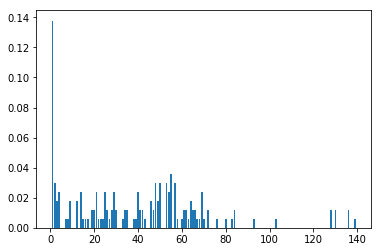

In [20]:
plot_degree_dist(graphNx)

### 3)

In [21]:
#degree assotivity
Gm.assortativity_degree(directed=False)

NameError: name 'Gm' is not defined

In [ ]:
# the degree of the nodes are relatively disassortative

### 4)

In [22]:
# clustering coefficient
Gm.transitivity_undirected(mode="nan")

NameError: name 'Gm' is not defined

### 5)

In [23]:
# average hop count/ average path length
Gm.average_path_length(directed=True)

NameError: name 'Gm' is not defined

In [24]:
# diameter
Gm.diameter(directed=True)

NameError: name 'Gm' is not defined

### 6)

In [25]:
# A small world network is characterized by a small average shortest path length, and a large clustering coefficient.

    sigma = 

    C = nx.transitivity(G)
    L = nx.average_shortest_path_length(G)
    Cr = np.mean(randMetrics["C"])
    Lr = np.mean(randMetrics["L"])

    sigma = (C / Cr) / (L / Lr)


In [26]:
C = Gm.transitivity_undirected(mode="nan")

NameError: name 'Gm' is not defined

In [27]:
L = Gm.average_path_length(directed=True)

NameError: name 'Gm' is not defined

In [28]:
ranGraph = Gm.Erdos_Renyi(167, m=3250, directed=False, loops=False)

NameError: name 'Gm' is not defined

In [29]:
Cr = ranGraph.transitivity_undirected(mode="nan")

NameError: name 'ranGraph' is not defined

In [ ]:
Lr = ranGraph.average_path_length(directed=True)

In [30]:
sigma = (C / Cr) / (L / Lr)

NameError: name 'C' is not defined

In [31]:
# if sigma >1, ( C >> Cr and L ~ Lr), network is small-world
sigma

NameError: name 'sigma' is not defined

### 7)

In [32]:
## Small test graph

In [33]:
n = max(testG,key=lambda item:item[1])[1]

In [34]:
testG_a_matrix = np.zeros((n,n))

In [35]:
for node1,node2 in testG:
    testG_a_matrix[node1-1][node2-1] = 1
    testG_a_matrix[node2-1][node1-1] = 1
print(testG_a_matrix)

[[0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [36]:
w,v = LA.eig(testG_a_matrix)
testG_maxeigen = max(w)
print(w)
print(testG_maxeigen)

[-1.8136065   2.34292308  0.47068342  0.         -1.          0.        ]
2.3429230827771694


In [37]:
## Aggregated graph

In [38]:
Node = max(G_A_edgelist,key=lambda item:item[1])[1]

In [39]:
G_A_a_matrix = np.zeros((Node,Node))

In [40]:
for node1,node2 in G_A_edgelist:
    G_A_a_matrix[node1-1][node2-1] = 1
    G_A_a_matrix[node2-1][node1-1] = 1

In [41]:
w,v = LA.eig(G_A_a_matrix)
G_A_maxeigen = max(w)
print(G_A_maxeigen)

(60.63926551053454+0j)


### 8)

In [42]:
G_A_l_matrix = np.zeros((Node,Node))

In [43]:
for row in range(0,Node):
    G_A_l_matrix[row][row]= sum(G_A_a_matrix[row])

In [44]:
G_A_l_matrix = G_A_l_matrix-G_A_a_matrix

In [45]:
w,v = LA.eig(G_A_l_matrix)
G_A_l_maxeigen = max(w)
G_A_l_maxeigen

(140.00159026290163+0j)

In [46]:
G_A_l_eigin = list(w)
G_A_l_eigin.remove(G_A_l_maxeigen)
G_A_l_2nd_maxeigin = max(G_A_l_eigin)
G_A_l_2nd_maxeigin

(137.00926224101613+0j)

# Question B

### 9)

In [47]:
keymax=max(graph_data.timestamp)
keymax

57791

In [48]:
graph_data_nodes = graph_data.drop(["timestamp"], axis=1)

In [212]:
G_predata = [tuple(x) for x in graph_data_nodes.values]

In [50]:
testG = G_predata[1:5]
repeat_list = [(3,1),(1,3),(3,5)]
testG.extend(repeat_list)
testG

[(1, 3), (1, 4), (1, 5), (1, 6), (3, 1), (1, 3), (3, 5)]

In [51]:
key = range(1,keymax+1)
G_Temp = dict([(k,[]) for k in key])

for i in range(len(G_predata)):
    G_Temp[graph_data.timestamp[i]].append(G_predata[i])
print(G_Temp[keymax])

[(85, 94)]


In [52]:
len(G_Temp)

57791

In [53]:
G_Temp

{1: [(1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (1, 7),
  (1, 8),
  (1, 9),
  (1, 10),
  (1, 11),
  (1, 12),
  (1, 13),
  (1, 14),
  (1, 15),
  (1, 16),
  (1, 17)],
 2: [(18, 19)],
 3: [(18, 19)],
 4: [(3, 20)],
 5: [(20, 21)],
 6: [(20, 22)],
 7: [(20, 23)],
 8: [(24, 25)],
 9: [(26, 27)],
 10: [(28, 29)],
 11: [(1, 7)],
 12: [(29, 30)],
 13: [(28, 29)],
 14: [(11, 31), (11, 32), (11, 25), (11, 33)],
 15: [(11, 31)],
 16: [(11, 33)],
 17: [(1, 7)],
 18: [(21, 34)],
 19: [(3, 35)],
 20: [(36, 37), (36, 37)],
 21: [(11, 25)],
 22: [(24, 25)],
 23: [(21, 23)],
 24: [(36, 38)],
 25: [(21, 39)],
 26: [(3, 13), (13, 40), (8, 13), (13, 35), (13, 41), (4, 13)],
 27: [(42, 43)],
 28: [(42, 43)],
 29: [(42, 43)],
 30: [(42, 43)],
 31: [(42, 44)],
 32: [(26, 45)],
 33: [(21, 46)],
 34: [(3, 42)],
 35: [(1, 16)],
 36: [(1, 16)],
 37: [(47, 48)],
 38: [(8, 16)],
 39: [(47, 48)],
 40: [(8, 16)],
 41: [(42, 49)],
 42: [(21, 26)],
 43: [(21, 49)],
 44: [(26, 32)],
 45: [(22, 29)],
 46: [(3, 8)

In [54]:
## simulating

In [55]:
dicttest1 = {1: 3, 2: 100, 600: 700}
dicttest2 = {1: 8, 2: 190, 600: 800}
dicttest4 = {1: 87, 2: 1780, 600: 5400}
#averageDict(dicttest)
dict3 =  {**dicttest1, **dicttest2}
#mergeDict(dicttest1, dicttest2, dicttest4)
#dict6 = mergeDict(dict3, dicttest4, )
dict3

{1: 8, 2: 190, 600: 800}

In [56]:
def mergeDict(dict1, dict2, dict3):
   ''' Merge dictionaries and keep values of common keys in list'''
   dict4 = {**dict1, **dict2,}
   for key, value in dict3.items():
       if key in dict1 and key in dict2:
                #dict3[key] = (dict1[key] + dict2[key])
                #dict3[key] = [value , dict1[key]]
                dict4 = {**dict1, **dict2, **dict3}

   return dict3

In [57]:
def averageDict(dicti):
    dict_new = {}
    for i in dicti:
        dict_new[i] = (dicti[i] / 167)
        print(dicti[i])
    return dict_new

In [58]:
dict_test = {}
#dict_test.keys() = range(20)
#dict_test = dict_test.fromkeys(range(1, 55), [])
#print(dict_test[1])  #.append(4)

#dict_test[7].append(11)
for key in range(1,55):
    dict_test[key] = []


#.append(11)
dict_test[7].append(11)
dict_test

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [11],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: []}

In [198]:
#dict_infected_all = {}
#seed = 2

List_dict = {}
List_dict = List_dict.fromkeys(range(1, 10000), [])
for key in range(1, 10000):
    List_dict[key] = []

for s in range(1, 168):
    seed = s
    infected=[]
    infected.append(seed)
    Temp_I = {}
    time=0
    for i in range(1,10000):
        flag=0
        for j in range(len(G_Temp[i])):
            if (len(infected) <= 167):      #max number of nodes infected for this seed node
                if (G_Temp[i][j][0] in infected) | (G_Temp[i][j][1] in infected):
                    infected.extend(list(G_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        
        List_dict[i].append(len(infected))
        
        #Temp_I[i] = len(infected)
            
        if flag==1:
            break

    # Merge dictionaries and add values of common keys in a list
    #List_dict = mergeDict(List_dict, Temp_I) #{**List_dict, **Temp_I}    #mergeDict(List_dict, Temp_I)

#print(List_dict)
#print(time)

In [211]:
G_Temp

{1: [(1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (1, 7),
  (1, 8),
  (1, 9),
  (1, 10),
  (1, 11),
  (1, 12),
  (1, 13),
  (1, 14),
  (1, 15),
  (1, 16),
  (1, 17)],
 2: [(18, 19)],
 3: [(18, 19)],
 4: [(3, 20)],
 5: [(20, 21)],
 6: [(20, 22)],
 7: [(20, 23)],
 8: [(24, 25)],
 9: [(26, 27)],
 10: [(28, 29)],
 11: [(1, 7)],
 12: [(29, 30)],
 13: [(28, 29)],
 14: [(11, 31), (11, 32), (11, 25), (11, 33)],
 15: [(11, 31)],
 16: [(11, 33)],
 17: [(1, 7)],
 18: [(21, 34)],
 19: [(3, 35)],
 20: [(36, 37), (36, 37)],
 21: [(11, 25)],
 22: [(24, 25)],
 23: [(21, 23)],
 24: [(36, 38)],
 25: [(21, 39)],
 26: [(3, 13), (13, 40), (8, 13), (13, 35), (13, 41), (4, 13)],
 27: [(42, 43)],
 28: [(42, 43)],
 29: [(42, 43)],
 30: [(42, 43)],
 31: [(42, 44)],
 32: [(26, 45)],
 33: [(21, 46)],
 34: [(3, 42)],
 35: [(1, 16)],
 36: [(1, 16)],
 37: [(47, 48)],
 38: [(8, 16)],
 39: [(47, 48)],
 40: [(8, 16)],
 41: [(42, 49)],
 42: [(21, 26)],
 43: [(21, 49)],
 44: [(26, 32)],
 45: [(22, 29)],
 46: [(3, 8)

In [199]:
np.var(List_dict[1]) #List_dict gives per time step the nodes that were infected at that time step

9.66259098569328

In [200]:
len(List_dict)

9999

In [201]:
#averageDict = averageDict(List_dict)

In [202]:
#averageDict

In [203]:
var_dict = {}

for i in range(1, len(List_dict)+1):
    var = np.var(List_dict[i])
    var_dict[i] = var

print(var_dict)

{1: 9.66259098569328, 2: 9.65262289791674, 3: 9.65262289791674, 4: 10.19470041952024, 5: 10.77786941087884, 6: 11.413030226971205, 7: 12.1108680841909, 8: 12.097457779052675, 9: 12.08376062246764, 10: 12.069776614435801, 11: 12.654236437305029, 12: 12.65452328875184, 13: 12.658467496145432, 14: 20.106206748180288, 15: 20.177059055541612, 16: 20.177059055541612, 17: 20.177059055541612, 18: 21.035677148696614, 19: 21.91688479328767, 20: 21.890422747319732, 21: 21.901036250851583, 22: 24.19778407257342, 23: 24.20223026999893, 24: 24.182078955860735, 25: 25.2075728781957, 26: 37.00261751945211, 27: 36.960522069633186, 28: 36.960522069633186, 29: 36.960522069633186, 30: 36.960522069633186, 31: 36.92079314425042, 32: 36.88041880311233, 33: 38.062533615403936, 34: 41.37466384596077, 35: 41.37502241026929, 36: 41.37502241026929, 37: 41.327620208684436, 38: 41.65047151206568, 39: 41.65047151206568, 40: 41.65047151206568, 41: 45.14037792678117, 42: 46.48965541969954, 43: 49.08881637921762, 44: 5

In [204]:
average_dict = {}

for i in range(1, len(List_dict)+1):
    var = np.average(List_dict[i])
    average_dict[i] = var

average_dict.values()

dict_values([1.910179640718563, 1.9221556886227544, 1.9221556886227544, 1.9461077844311376, 1.9760479041916168, 2.0119760479041915, 2.053892215568862, 2.065868263473054, 2.0778443113772456, 2.089820359281437, 2.1497005988023954, 2.1676646706586826, 2.1736526946107784, 2.5089820359281436, 2.532934131736527, 2.532934131736527, 2.532934131736527, 2.568862275449102, 2.5988023952095807, 2.6107784431137726, 2.6167664670658684, 2.7005988023952097, 2.718562874251497, 2.7365269461077846, 2.7904191616766467, 3.251497005988024, 3.2634730538922154, 3.2634730538922154, 3.2634730538922154, 3.2634730538922154, 3.281437125748503, 3.2994011976047903, 3.3592814371257487, 3.467065868263473, 3.4730538922155687, 3.4730538922155687, 3.4850299401197606, 3.5269461077844313, 3.5269461077844313, 3.5269461077844313, 3.6407185628742513, 3.718562874251497, 3.8622754491017965, 3.9820359281437128, 4.0359281437125745, 5.179640718562874, 5.227544910179641, 5.3532934131736525, 5.461077844311378, 5.461077844311378, 5.46

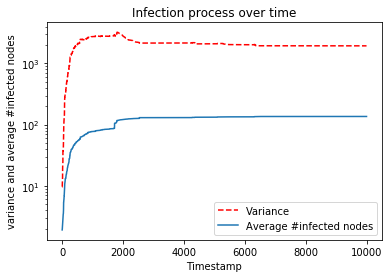

In [205]:
names_var = list(var_dict.keys())
values_var = list(var_dict.values())
names_average = list(average_dict.keys())
values_average = list(average_dict.values())

# Variables for variance
y1 = values_var 
x1 = range(len(var_dict))

# Variables for average
y2 = values_average 
x2 = range(len(average_dict))


plt.plot(x1, y1, 'r--', label='Variance')
plt.plot(x2, y2, label='Average #infected nodes')
plt.yscale('log')

plt.ylabel('variance and average #infected nodes')
plt.xlabel('Timestamp')
plt.title('Infection process over time')
plt.legend()
plt.show()

### 10)

In [242]:
#iteration N=10
N=166

In [243]:
Time_80=[]
for seed in range(1,N+1):
    infected=[]
    time=0
    infected.append(seed)
    for i in range(1,keymax):
        flag=0
        for j in range(len(G_Temp[i])):
            if (len(infected) < 133):
                if (G_Temp[i][j][0] in infected) | (G_Temp[i][j][1] in infected):
                    infected.extend(list(G_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        if flag==1:
            break
    Time_80.append([time,seed])

In [244]:
Time_80_ranked=sorted(Time_80)
Time_80_ranked

[[1720, 1],
 [1720, 2],
 [1720, 3],
 [1720, 4],
 [1720, 5],
 [1720, 6],
 [1720, 7],
 [1720, 8],
 [1720, 9],
 [1720, 10],
 [1720, 11],
 [1720, 12],
 [1720, 13],
 [1720, 14],
 [1720, 15],
 [1720, 16],
 [1720, 17],
 [1720, 18],
 [1720, 19],
 [1720, 20],
 [1720, 21],
 [1720, 22],
 [1720, 23],
 [1720, 24],
 [1720, 25],
 [1720, 26],
 [1720, 27],
 [1720, 28],
 [1720, 29],
 [1720, 30],
 [1720, 31],
 [1720, 32],
 [1720, 33],
 [1720, 34],
 [1720, 35],
 [1720, 36],
 [1720, 37],
 [1720, 38],
 [1720, 39],
 [1720, 40],
 [1720, 41],
 [1720, 42],
 [1720, 43],
 [1720, 44],
 [1720, 45],
 [1720, 46],
 [1720, 47],
 [1720, 48],
 [1720, 49],
 [1720, 50],
 [1720, 51],
 [1720, 52],
 [1720, 53],
 [1720, 54],
 [1720, 55],
 [1720, 56],
 [1720, 57],
 [1720, 58],
 [1720, 59],
 [1720, 60],
 [1720, 61],
 [1720, 62],
 [1720, 63],
 [1720, 64],
 [1720, 65],
 [1720, 66],
 [1720, 67],
 [1720, 68],
 [1720, 69],
 [1720, 70],
 [1720, 71],
 [1720, 72],
 [1720, 73],
 [1720, 74],
 [1720, 75],
 [1720, 76],
 [1720, 77],
 [1720, 

In [245]:
R=np.zeros(N)
print()
for i in range(N):
    R[i]=Time_80_ranked[i][1]
R

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 114., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

### 11)

In [71]:
#clustering coefficient
clustering_coef = nx.clustering(graphNx)
cc_sorted = OrderedDict(sorted(clustering_coef.items(), key = itemgetter(1), reverse = True))
cc_sorted

OrderedDict([(127, 1.0),
             (135, 1.0),
             (129, 1.0),
             (126, 1.0),
             (114, 1.0),
             (134, 1.0),
             (132, 1.0),
             (160, 1.0),
             (131, 1.0),
             (120, 0.9848484848484849),
             (125, 0.9848484848484849),
             (118, 0.9632352941176471),
             (78, 0.9545454545454546),
             (119, 0.9428571428571428),
             (133, 0.9340659340659341),
             (128, 0.9230769230769231),
             (108, 0.9166666666666666),
             (123, 0.8953846153846153),
             (110, 0.8771929824561403),
             (41, 0.8738461538461538),
             (116, 0.8571428571428571),
             (28, 0.8538011695906432),
             (91, 0.8523809523809524),
             (124, 0.8466666666666667),
             (121, 0.8421052631578947),
             (55, 0.8399014778325123),
             (130, 0.8368421052631579),
             (11, 0.8366666666666667),
             (138, 0.

In [72]:
list(cc_sorted)[0]

127

In [73]:
N1 = 167
C=np.zeros(N1)
print()
for i in range(N1):
    C[i]=list(cc_sorted)[i]
C

array([127., 135., 129., 126., 114., 134., 132., 160., 131., 120., 125.,
       118.,  78., 119., 133., 128., 108., 123., 110.,  41., 116.,  28.,
        91., 124., 121.,  55., 130.,  11., 138.,  96.,  99.,  12., 149.,
       103.,  52., 122.,  17., 109., 102., 107.,  16., 136., 151., 105.,
        61.,  49.,  85.,  89.,  92.,  24., 111.,  51.,  77.,  60.,  34.,
        87.,  19., 100.,  67.,  25.,  64.,  79.,  97.,  75.,  95.,  43.,
        72.,  76., 106.,  74., 101.,  62.,  30.,  65.,  66.,  36.,  39.,
        88.,  73.,   9.,  81., 117.,  82.,  48.,  98.,  58.,  59.,  93.,
         5.,  22.,   8., 104.,  44., 112.,  80.,  31.,  70.,  27.,  15.,
        21.,  71.,  90.,  53.,  33.,  69.,  68.,  83.,  26.,  20.,  56.,
        13.,  10.,  14.,  86.,  54.,  32.,   6.,  63.,  94.,   4.,  40.,
        84.,   3.,   7.,   2.,  57.,  29.,  42.,  18.,  23., 115.,  50.,
        46.,  35., 113.,   1.,  47.,  45.,  37.,  38., 164., 146., 147.,
       162., 163., 159., 144., 157., 145., 165., 16

In [74]:
#degrees of the nodes 
degrees = dict(graphNx.degree())
degrees_sorted = OrderedDict(sorted(degrees.items(), key = itemgetter(1), reverse = True))
degrees_sorted

OrderedDict([(38, 139),
             (45, 136),
             (37, 136),
             (47, 130),
             (1, 130),
             (35, 128),
             (113, 128),
             (115, 103),
             (50, 93),
             (46, 84),
             (42, 84),
             (18, 83),
             (23, 80),
             (7, 76),
             (94, 72),
             (69, 72),
             (90, 70),
             (86, 69),
             (56, 69),
             (29, 69),
             (2, 69),
             (3, 68),
             (84, 67),
             (27, 66),
             (68, 66),
             (14, 65),
             (4, 65),
             (15, 64),
             (13, 64),
             (112, 64),
             (9, 63),
             (32, 62),
             (44, 62),
             (70, 61),
             (10, 61),
             (80, 60),
             (59, 58),
             (63, 57),
             (40, 57),
             (8, 57),
             (83, 57),
             (66, 57),
             (48, 55),
       

In [75]:
D=np.zeros(N1)
print()
for i in range(N1):
    D[i]=list(degrees_sorted)[i]
D[:10]

array([ 38.,  45.,  37.,  47.,   1.,  35., 113., 115.,  50.,  46.])

In [76]:
#Rrd(f) 
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rrdf = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    Df = D[:numNodes]
    InterRD = np.intersect1d(Rf, Df)
    Rrdf_i = len(InterRD)/len(Rf)
    Rrdf.append(Rrdf_i)
    
print(Rrdf)

[0.125, 0.125, 0.24, 0.42424242424242425, 0.4878048780487805, 0.6, 0.6379310344827587, 0.6666666666666666, 0.7466666666666667, 0.8192771084337349]


In [77]:
#Rrc(f) 
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rrcf = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    Cf = C[:numNodes]
    InterRC = np.intersect1d(Rf, Cf)
    Rrcf_i = len(InterRC)/len(Rf)
    Rrcf.append(Rrcf_i)
    
print(Rrcf)

[0.0, 0.0, 0.0, 0.09090909090909091, 0.14634146341463414, 0.16, 0.22413793103448276, 0.2727272727272727, 0.3466666666666667, 0.43373493975903615]


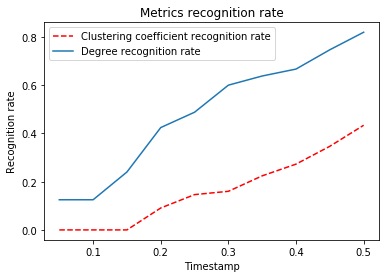

In [78]:
# Clustering coefficient recognition rate
y1 = Rrcf
x1 = f

# Degree recognition rate
y2 = Rrdf 
x2 = f


plt.plot(x1, y1, 'r--', label='Clustering coefficient recognition rate')
plt.plot(x2, y2, label='Degree recognition rate')

plt.ylabel('Recognition rate')
plt.xlabel('Timestamp')
plt.title('Metrics recognition rate')
plt.legend()
plt.show()

In [79]:
## Degree can better predict predict the influence of nodes

### 12)

### Metric 1: Closeness centrality

In [80]:
# Eigenvalue centrality
eigen_centrality = nx.eigenvector_centrality(graphNx, weight = 'weights')
EC_sorted = OrderedDict(sorted(eigen_centrality.items(), key = itemgetter(1), reverse = True))
EC_sorted


OrderedDict([(38, 0.1710668323828997),
             (45, 0.17022090222994946),
             (37, 0.16984954850432213),
             (1, 0.1695246765959596),
             (47, 0.1689588411622532),
             (35, 0.16876559638582417),
             (113, 0.16876559638582417),
             (115, 0.1491564223272743),
             (50, 0.13191101983787132),
             (42, 0.12989891691993466),
             (18, 0.1265286750607161),
             (7, 0.1209651464398492),
             (69, 0.11735020572330833),
             (23, 0.11593550211004584),
             (46, 0.11519921230366698),
             (90, 0.11507948395129262),
             (94, 0.1139865751871372),
             (56, 0.11259055559954852),
             (86, 0.11081487149558171),
             (2, 0.10931415206544558),
             (27, 0.10915363816654253),
             (68, 0.10751265604346745),
             (29, 0.10714261423134615),
             (9, 0.10658998526282278),
             (3, 0.10655661513902212),
          

In [81]:
N1 = 167
EC=np.zeros(N1)
print()
for i in range(N1):
    EC[i]=list(EC_sorted)[i]
EC

array([ 38.,  45.,  37.,   1.,  47.,  35., 113., 115.,  50.,  42.,  18.,
         7.,  69.,  23.,  46.,  90.,  94.,  56.,  86.,   2.,  27.,  68.,
        29.,   9.,   3., 112.,  84.,  14.,  13.,  15.,  44.,   4.,  70.,
        80.,  32.,  59.,  10.,  66.,   8.,  48.,  83.,  72.,  22.,  93.,
        63.,  21.,  81., 104.,  53.,  71.,   5.,  40.,  58.,  67., 117.,
        31.,  43.,  26.,  95.,  76.,  85.,  30.,  77.,  57.,  65.,  75.,
        74.,  20.,  33.,  62.,  98.,  88.,  39.,  54.,   6.,  24., 100.,
        87.,  36.,  79.,  64.,  82.,  73.,  19.,  89.,  17., 151.,  49.,
       101.,  34.,  25.,  55.,  52.,  51.,  61., 123.,  41., 105., 109.,
        60., 106., 124., 107.,  12., 103.,  16.,  11.,  96.,  91.,  99.,
       149., 102., 130., 110.,  28., 118., 121., 111., 119., 108., 128.,
       133., 122., 125.,  78., 120.,  92., 129., 126., 136., 116.,  97.,
       134., 127., 114., 138., 135., 132., 131., 160., 144., 139., 167.,
       165., 159., 164., 163., 142., 145., 166., 15

### Metric 2: Betweenness centrality

In [82]:
## Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graphNx)
betweenness_sorted = OrderedDict(sorted(betweenness_centrality.items(), key = itemgetter(1), reverse = True))
betweenness_sorted

OrderedDict([(38, 0.08242003796017484),
             (37, 0.06496273893787789),
             (45, 0.06469467860408137),
             (47, 0.05236665665800161),
             (1, 0.040290342374838486),
             (68, 0.03869156858121181),
             (35, 0.0364287926478484),
             (113, 0.0364287926478484),
             (84, 0.03361635159102187),
             (80, 0.026423038140718225),
             (59, 0.02620999482131866),
             (23, 0.02127831399890789),
             (57, 0.02069227892794181),
             (26, 0.020425378501198785),
             (18, 0.019949765751694992),
             (86, 0.0164234219646966),
             (46, 0.016264372340837552),
             (115, 0.015935225445480806),
             (15, 0.01503585989628194),
             (53, 0.015019492709188132),
             (50, 0.014804910329580784),
             (104, 0.013941242372284236),
             (36, 0.01312496161661383),
             (64, 0.012872140495785367),
             (2, 0.012557335415

In [83]:
N1 = 167
B=np.zeros(N1)
print()
for i in range(N1):
    B[i]=list(betweenness_sorted)[i]
B

array([ 38.,  37.,  45.,  47.,   1.,  68.,  35., 113.,  84.,  80.,  59.,
        23.,  57.,  26.,  18.,  86.,  46., 115.,  15.,  53.,  50., 104.,
        36.,  64.,   2., 122., 146.,  97., 136.,  14.,  81.,  42.,  32.,
        29.,   3.,  94.,   7.,  90.,  63.,  69.,  56.,   4.,  51., 112.,
        40., 102.,  13.,  27.,  10.,  44.,   9.,  70.,   8.,  21.,  83.,
        71.,  93.,  20.,  48.,  66.,   6.,  31., 117.,  22.,  39.,  54.,
         5.,  33.,  58.,  65.,  72.,  88.,  98.,  74.,  30.,  76.,  62.,
       101.,  73.,  82.,  43.,  95.,  67.,  75.,  79.,  77.,  85., 100.,
        19.,  24.,  89.,  87.,  25., 103., 106.,  34., 151.,  60.,  49.,
        17., 105.,  61., 109.,  52., 107.,  16.,  55.,  12., 149., 111.,
        99., 124.,  96.,  41.,  92.,  11., 123., 130., 121.,  91.,  28.,
       110., 108., 116., 133., 128., 119., 118., 139.,  78., 165., 159.,
       120., 125., 138., 127., 135., 129., 164., 147., 126., 162., 114.,
       134., 132., 163., 144., 157., 160., 145., 13

In [84]:
### compare

In [85]:
##Closeness centrality and Influence
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rref = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    Ef = EC[:numNodes] #Dit is EC toch? Stond vm E maar bij mij kende die geen E (dus error dat E niet gedefinieerd was)
    InterRE = np.intersect1d(Rf, Ef)
    Rref_i = len(InterRE)/len(Rf)
    Rref.append(Rref_i)
    
print(Rref)

[0.125, 0.125, 0.28, 0.3939393939393939, 0.4634146341463415, 0.56, 0.6206896551724138, 0.6363636363636364, 0.7466666666666667, 0.8072289156626506]


In [86]:
##Betweenness and Influence
##Rrb(f) 
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rrbf = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    Bf = B[:numNodes]
    InterRB = np.intersect1d(Rf, Bf)
    Rrbf_i = len(InterRB)/len(Rf)
    Rrbf.append(Rrbf_i)
    
print(Rrbf)

[0.125, 0.0625, 0.2, 0.24242424242424243, 0.36585365853658536, 0.52, 0.5862068965517241, 0.6666666666666666, 0.7333333333333333, 0.7710843373493976]


### Metric 3: Temporal node Degree (Temporal node centrality metric)

In [87]:
#Degree weighted by the time. See defintion "Nodal Measure: Temporal Centrality" in Thompson, W. H., Brantefors, P., & Fransson, P. (2017). From static to temporal
    #network theory: Applications to functional brain connectivity. Network Neuroscience, 1(2), 69-99.
#Nodal Measure: Temporal Centrality of nodes
#The following code counts the number of times a node has a contact over the range of time.

degrees_node1 = graph_data_nodes["node1"].value_counts().sort_values(ascending = False)
degrees_node2 = graph_data_nodes["node2"].value_counts().sort_values(ascending = False)
dict_degrees_node1 = degrees_node1.to_dict()
dict_degrees_node2 = degrees_node2.to_dict()
Temp_Degree_dict = {**dict_degrees_node1, **dict_degrees_node2}
Temp_Degree_dict
len(Temp_Degree_dict)

167

In [88]:
Temp_Degree_dict_sorted = OrderedDict(sorted(Temp_Degree_dict.items(), key = itemgetter(1), reverse = True))
Temp_Degree_dict_sorted

OrderedDict([(94, 3884),
             (1, 3376),
             (14, 3238),
             (86, 3057),
             (76, 2543),
             (84, 2264),
             (68, 1972),
             (66, 1941),
             (13, 1915),
             (50, 1879),
             (96, 1838),
             (54, 1626),
             (88, 1500),
             (70, 1498),
             (67, 1478),
             (69, 1441),
             (75, 1305),
             (59, 1252),
             (56, 1235),
             (40, 1174),
             (85, 1174),
             (74, 1156),
             (83, 1145),
             (53, 1140),
             (38, 1103),
             (80, 1070),
             (8, 1053),
             (72, 1039),
             (95, 1035),
             (17, 1007),
             (90, 1004),
             (35, 958),
             (77, 915),
             (73, 860),
             (32, 840),
             (117, 824),
             (4, 811),
             (81, 801),
             (115, 778),
             (45, 773),
          

In [89]:
N1 = 167
TD=np.zeros(N1) #Temporal Degree
for i in range(N1):
    TD[i]=list(Temp_Degree_dict_sorted)[i]
TD

array([ 94.,   1.,  14.,  86.,  76.,  84.,  68.,  66.,  13.,  50.,  96.,
        54.,  88.,  70.,  67.,  69.,  75.,  59.,  56.,  40.,  85.,  74.,
        83.,  53.,  38.,  80.,   8.,  72.,  95.,  17.,  90.,  35.,  77.,
        73.,  32., 117.,   4.,  81., 115.,  45.,  15.,  42.,  58.,  71.,
       106., 101.,  65.,  27.,  93.,  43.,  20.,  51.,  33.,  48., 104.,
        52.,  98.,  89., 112.,  63.,  11.,  47.,  39.,  44.,  29.,  57.,
        18.,  30.,  26.,  82.,  79.,  61.,  31.,  62., 123., 105.,  64.,
       121.,   9.,  37., 113., 103.,   7.,  19.,  16.,   6.,  22.,  10.,
        92., 124., 107.,  55.,  41.,  34., 109.,  21.,  46.,  24., 108.,
        25.,  99.,  87., 151., 100.,  60.,  12.,   3.,   2., 149., 119.,
         5., 120., 110., 116.,  91.,  49., 111., 138., 145., 139.,  23.,
       140., 148., 144., 128., 118.,  36.,  28., 141., 143., 134., 150.,
       130., 122., 102.,  78., 142., 133.,  97., 129., 146., 125., 126.,
       152., 153., 136., 147., 114., 137., 131., 13

In [90]:
##Temporal Degree Node and Influence
##Rrtd(f) 

f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rrtd = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    TDf = TD[:numNodes]
    InterRTD = np.intersect1d(Rf, TDf)
    Rrtd_i = len(InterRTD)/len(Rf)
    Rrtd.append(Rrtd_i)
    
print(Rrtd)

[0.125, 0.1875, 0.12, 0.15151515151515152, 0.2682926829268293, 0.32, 0.43103448275862066, 0.5303030303030303, 0.6666666666666666, 0.7349397590361446]


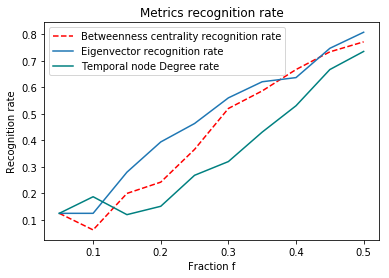

In [91]:
#Betweenness
y1 = Rrbf
x1 = f

#Closeness centrality
y2 = Rref 
x2 = f

#Temporal node degree
y5 = Rrtd 
x5 = f

plt.plot(x1, y1, 'r--', label='Betweenness centrality recognition rate')
plt.plot(x2, y2, label='Eigenvector recognition rate')
plt.plot(x5, y5, 'teal', label='Temporal node Degree rate')

plt.ylabel('Recognition rate')
plt.xlabel('Fraction f')
plt.title('Metrics recognition rate')
plt.legend()
plt.show()

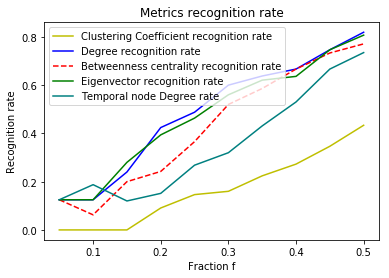

In [92]:
#Clustering coefficient
y1 = Rrcf
x1 = f

#Degree
y2 = Rrdf 
x2 = f

#Betweenness
y3 = Rrbf
x3 = f

#Closeness centrality
y4 = Rref 
x4 = f

#Temporal node degree
y5 = Rrtd 
x5 = f


plt.plot(x1, y1, 'y', label='Clustering Coefficient recognition rate')
plt.plot(x2, y2, 'b', label='Degree recognition rate')


plt.plot(x3, y3, 'r--', label='Betweenness centrality recognition rate')
plt.plot(x4, y4, 'g', label='Eigenvector recognition rate')

plt.plot(x5, y5, 'teal', label='Temporal node Degree rate')

plt.ylabel('Recognition rate')
plt.xlabel('Fraction f')
plt.title('Metrics recognition rate')
plt.legend()
plt.show()

In [246]:
G_Temp

{1: [(1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (1, 7),
  (1, 8),
  (1, 9),
  (1, 10),
  (1, 11),
  (1, 12),
  (1, 13),
  (1, 14),
  (1, 15),
  (1, 16),
  (1, 17)],
 2: [(18, 19)],
 3: [(18, 19)],
 4: [(3, 20)],
 5: [(20, 21)],
 6: [(20, 22)],
 7: [(20, 23)],
 8: [(24, 25)],
 9: [(26, 27)],
 10: [(28, 29)],
 11: [(1, 7)],
 12: [(29, 30)],
 13: [(28, 29)],
 14: [(11, 31), (11, 32), (11, 25), (11, 33)],
 15: [(11, 31)],
 16: [(11, 33)],
 17: [(1, 7)],
 18: [(21, 34)],
 19: [(3, 35)],
 20: [(36, 37), (36, 37)],
 21: [(11, 25)],
 22: [(24, 25)],
 23: [(21, 23)],
 24: [(36, 38)],
 25: [(21, 39)],
 26: [(3, 13), (13, 40), (8, 13), (13, 35), (13, 41), (4, 13)],
 27: [(42, 43)],
 28: [(42, 43)],
 29: [(42, 43)],
 30: [(42, 43)],
 31: [(42, 44)],
 32: [(26, 45)],
 33: [(21, 46)],
 34: [(3, 42)],
 35: [(1, 16)],
 36: [(1, 16)],
 37: [(47, 48)],
 38: [(8, 16)],
 39: [(47, 48)],
 40: [(8, 16)],
 41: [(42, 49)],
 42: [(21, 26)],
 43: [(21, 49)],
 44: [(26, 32)],
 45: [(22, 29)],
 46: [(3, 8)

In [249]:
Dict_Time_80={}
Dict_Time_80 = Dict_Time_80.fromkeys(range(1, 168), [])

for seed in range(1,167):
    infected=[]
    infected_time = []
    time=0
    infected.append(seed)
    for i in range(1, keymax+1):
        flag =0
        for j in range(len(G_Temp[i])):
            if (len(infected) < 133):
                if (G_Temp[i][j][0] in infected) | (G_Temp[i][j][1] in infected):
                    infected.extend(list(G_Temp[i][j]))
                    infected_time.append((i, list(G_Temp[i][j])))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                Dict_Time_80[seed] = infected_time
                break
            
        if flag==1:
            break
    

In [250]:
Dict_Time_80[166]

[(31215, [68, 166]),
 (31215, [47, 68]),
 (31218, [68, 85]),
 (31227, [48, 85]),
 (31228, [48, 85]),
 (31230, [13, 48]),
 (31241, [47, 68]),
 (31252, [1, 13]),
 (31252, [1, 4]),
 (31252, [1, 16]),
 (31252, [1, 17]),
 (31253, [13, 48]),
 (31254, [4, 13]),
 (31254, [13, 35]),
 (31259, [4, 13]),
 (31260, [4, 74]),
 (31263, [4, 74]),
 (31272, [13, 40]),
 (31272, [13, 66]),
 (31272, [3, 13]),
 (31272, [8, 13]),
 (31273, [4, 13]),
 (31273, [4, 40]),
 (31273, [4, 35]),
 (31273, [4, 53]),
 (31273, [4, 81]),
 (31273, [4, 18]),
 (31277, [4, 35]),
 (31279, [4, 18]),
 (31281, [13, 66]),
 (31282, [13, 17]),
 (31282, [3, 13]),
 (31282, [4, 13]),
 (31282, [13, 35]),
 (31283, [4, 13]),
 (31284, [4, 35]),
 (31285, [13, 35]),
 (31287, [8, 13]),
 (31290, [3, 13]),
 (31291, [18, 63]),
 (31292, [2, 40]),
 (31292, [2, 74]),
 (31292, [2, 13]),
 (31295, [47, 50]),
 (31295, [50, 68]),
 (31296, [18, 26]),
 (31296, [18, 107]),
 (31298, [48, 70]),
 (31298, [68, 70]),
 (31299, [48, 70]),
 (31301, [47, 50]),
 (3130

In [117]:
dict_1 = {}
for i in range(len(Dict_Time_80[1]):
               if Dict_Time_80[1][i][1]

[1, 3]

In [190]:
Dict_Time_80

{1: [(1, [1, 2]),
  (1, [1, 3]),
  (1, [1, 4]),
  (1, [1, 5]),
  (1, [1, 6]),
  (1, [1, 7]),
  (1, [1, 8]),
  (1, [1, 9]),
  (1, [1, 10]),
  (1, [1, 11]),
  (1, [1, 12]),
  (1, [1, 13]),
  (1, [1, 14]),
  (1, [1, 15]),
  (1, [1, 16]),
  (1, [1, 17]),
  (4, [3, 20]),
  (5, [20, 21]),
  (6, [20, 22]),
  (7, [20, 23]),
  (11, [1, 7]),
  (14, [11, 31]),
  (14, [11, 32]),
  (14, [11, 25]),
  (14, [11, 33]),
  (15, [11, 31]),
  (16, [11, 33]),
  (17, [1, 7]),
  (18, [21, 34]),
  (19, [3, 35]),
  (21, [11, 25]),
  (22, [24, 25]),
  (23, [21, 23]),
  (25, [21, 39]),
  (26, [3, 13]),
  (26, [13, 40]),
  (26, [8, 13]),
  (26, [13, 35]),
  (26, [13, 41]),
  (26, [4, 13]),
  (33, [21, 46]),
  (34, [3, 42]),
  (35, [1, 16]),
  (36, [1, 16]),
  (38, [8, 16]),
  (40, [8, 16]),
  (41, [42, 49]),
  (42, [21, 26]),
  (43, [21, 49]),
  (44, [26, 32]),
  (45, [22, 29]),
  (46, [3, 8]),
  (46, [3, 13]),
  (46, [3, 50]),
  (46, [3, 35]),
  (46, [3, 51]),
  (46, [3, 52]),
  (46, [3, 18]),
  (46, [3, 53]),
  

In [ ]:
len(Dict_Time_80

In [252]:
time_dict = {}
time_dict = time_dict.fromkeys(range(1, 167), [])
for seed in range(1,len(Dict_Time_80)):
    list_timestamp = []
    infected_list_2= []
    for i in range(len(Dict_Time_80[seed])):
        if (Dict_Time_80[seed][i][1][0] and Dict_Time_80[seed][i][1][1]) not in infected_list_2:
            infected_list_2.append(Dict_Time_80[seed][i][1][0]) 
            infected_list_2.append(Dict_Time_80[seed][i][1][1])
            list_timestamp.append(Dict_Time_80[seed][i][0])
    time_dict[seed] = list_timestamp

#alerady_appeared_in_dict
len(time_dict)

166

In [253]:
time_dict

{1: [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  4,
  5,
  6,
  7,
  14,
  14,
  14,
  14,
  18,
  19,
  25,
  26,
  26,
  33,
  34,
  41,
  42,
  45,
  46,
  46,
  46,
  46,
  46,
  49,
  53,
  63,
  70,
  74,
  76,
  76,
  76,
  78,
  80,
  81,
  81,
  81,
  81,
  82,
  85,
  85,
  85,
  85,
  92,
  95,
  124,
  131,
  132,
  145,
  162,
  168,
  181,
  184,
  186,
  189,
  197,
  215,
  221,
  226,
  226,
  226,
  226,
  226,
  257,
  259,
  262,
  262,
  293,
  296,
  305,
  329,
  330,
  362,
  370,
  373,
  410,
  421,
  461,
  461,
  506,
  507,
  573,
  579,
  596,
  596,
  596,
  596,
  596,
  596,
  654,
  738,
  774,
  799,
  834,
  852,
  852,
  852,
  952,
  1092,
  1092,
  1263,
  1296,
  1316,
  1396,
  1559,
  1689,
  1720,
  1720,
  1720,
  1720,
  1720,
  1720,
  1720,
  1720,
  1720,
  1720],
 2: [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  4,
  5,
  6,
  7,
  14,
  14,
  14,
  14,
  18,
  19,
  

In [254]:
averageDict_time_dict = {}

for k,v in time_dict.items():
    averageDict_time_dict[k] = sum(v)/float(len(v))

In [255]:
averageDict_time_dict

{1: 397.1603053435114,
 2: 397.1603053435114,
 3: 402.82442748091603,
 4: 420.1825396825397,
 5: 420.8809523809524,
 6: 439.648,
 7: 440.656,
 8: 440.736,
 9: 441.096,
 10: 444.4,
 11: 445.064,
 12: 461.5967741935484,
 13: 465.3414634146341,
 14: 488.8360655737705,
 15: 492.22131147540983,
 16: 496.2809917355372,
 17: 496.56198347107437,
 18: 500.21666666666664,
 19: 500.21666666666664,
 20: 454.864,
 21: 466.6422764227642,
 22: 473.6115702479339,
 23: 482.2352941176471,
 24: 559.5416666666666,
 25: 559.5416666666666,
 26: 501.9159663865546,
 27: 501.9159663865546,
 28: 620.6637931034483,
 29: 620.6637931034483,
 30: 631.4655172413793,
 31: 558.9833333333333,
 32: 558.9916666666667,
 33: 559.65,
 34: 499.975,
 35: 479.54545454545456,
 36: 654.0689655172414,
 37: 654.0689655172414,
 38: 665.9310344827586,
 39: 506.43220338983053,
 40: 505.89915966386553,
 41: 503.55833333333334,
 42: 472.4710743801653,
 43: 472.4710743801653,
 44: 478.23333333333335,
 45: 510.25210084033614,
 46: 507.13

In [261]:
averageDict_time_dict

averageDict_time_dict_sorted = OrderedDict(sorted(averageDict_time_dict.items(), key = itemgetter(1), reverse = False))
averageDict_time_dict_sorted

OrderedDict([(1, 397.1603053435114),
             (2, 397.1603053435114),
             (3, 402.82442748091603),
             (4, 420.1825396825397),
             (5, 420.8809523809524),
             (6, 439.648),
             (7, 440.656),
             (8, 440.736),
             (9, 441.096),
             (10, 444.4),
             (11, 445.064),
             (20, 454.864),
             (12, 461.5967741935484),
             (13, 465.3414634146341),
             (21, 466.6422764227642),
             (42, 472.4710743801653),
             (43, 472.4710743801653),
             (22, 473.6115702479339),
             (44, 478.23333333333335),
             (35, 479.54545454545456),
             (23, 482.2352941176471),
             (14, 488.8360655737705),
             (15, 492.22131147540983),
             (16, 496.2809917355372),
             (17, 496.56198347107437),
             (34, 499.975),
             (18, 500.21666666666664),
             (19, 500.21666666666664),
             (26, 50

In [262]:
AT80=np.zeros(166)
print()
for i in range(166):
    AT80[i]=list(averageDict_time_dict_sorted)[i]
AT80

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        20.,  12.,  13.,  21.,  42.,  43.,  22.,  44.,  35.,  23.,  14.,
        15.,  16.,  17.,  34.,  18.,  19.,  26.,  27.,  41.,  50.,  51.,
        52.,  53.,  40.,  39.,  46.,  45.,  49.,  57.,  58.,  55.,  56.,
        31.,  32.,  24.,  25.,  33.,  60.,  67.,  61.,  66.,  68.,  69.,
        54.,  65.,  62.,  63.,  64.,  81.,  71.,  75.,  47.,  48.,  77.,
        72.,  73.,  74.,  28.,  29.,  30.,  70.,  82.,  36.,  37.,  76.,
        88.,  89.,  90.,  84.,  85.,  86.,  38.,  59.,  79.,  80.,  91.,
        87.,  92.,  96.,  97.,  94.,  83.,  93.,  95.,  99.,  98., 100.,
       101., 102.,  78., 106., 103., 107., 108., 109., 110., 104., 111.,
       105., 112., 115., 117., 118., 119., 120., 116., 113., 121., 122.,
       114., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 139., 141., 145., 140., 146., 147., 143.,
       142., 148., 138., 137., 144., 149., 150., 15

In [265]:
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
AT80rcf = []
for i in f:
    numNodes = int(i*167)
    AT80f = AT80[:numNodes]
    Cf = C[:numNodes]
    InterAT80C = np.intersect1d(AT80f, Cf)
    AT80rcf_i = len(InterAT80C)/len(AT80f)
    AT80rcf.append(AT80rcf_i)
    
print(AT80rcf)

[0.0, 0.0, 0.0, 0.09090909090909091, 0.14634146341463414, 0.18, 0.2413793103448276, 0.30303030303030304, 0.36, 0.4457831325301205]


In [266]:
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
AT80rdf = []
for i in f:
    numNodes = int(i*167)
    AT80f = AT80[:numNodes]
    Df = D[:numNodes]
    InterAT80D = np.intersect1d(AT80f, Df)
    AT80rdf_i = len(InterAT80D)/len(AT80f)
    AT80rdf.append(AT80rdf_i)
    
print(AT80rdf)

[0.125, 0.1875, 0.28, 0.48484848484848486, 0.5121951219512195, 0.56, 0.603448275862069, 0.6818181818181818, 0.7333333333333333, 0.8192771084337349]


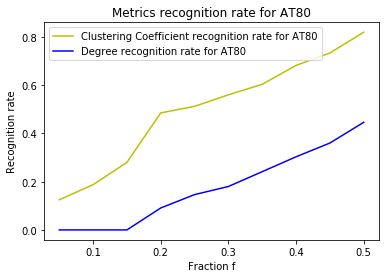

In [269]:
#Clustering coefficient
y1 = AT80rdf
x1 = f

#Degree
y2 = AT80rcf 
x2 = f


plt.plot(x1, y1, 'y', label='Clustering Coefficient recognition rate for AT80')
plt.plot(x2, y2, 'b', label='Degree recognition rate for AT80')

plt.ylabel('Recognition rate')
plt.xlabel('Fraction f')
plt.title('Metrics recognition rate for AT80')
plt.legend()
plt.show()